In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('February',
                   skiprows=3,       # ignore the first 3 rows of data
                   sep=';',          # semicolon is used to separate data values
                   index_col=1,      # use column 1 as the dates to index the data
                   parse_dates=True) # convert the date string into a date object

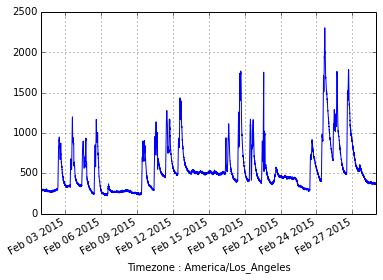

In [5]:
data['CO2'].plot()

Start time = 2015-02-03 9:50
End time = 2015-02-03 12:00
26
Carbon dioxide rate of increase 2.20 ppm per minute
Estimated number of students: 12
()
Start time = 2015-02-05 9:50
End time = 2015-02-05 12:00
26
Carbon dioxide rate of increase 5.17 ppm per minute
Estimated number of students: 29
()
Start time = 2015-02-10 9:50
End time = 2015-02-10 12:00
26
Carbon dioxide rate of increase 5.52 ppm per minute
Estimated number of students: 31
()
Start time = 2015-02-12 9:50
End time = 2015-02-12 12:00
27
Carbon dioxide rate of increase 3.81 ppm per minute
Estimated number of students: 22
()
Start time = 2015-02-17 9:50
End time = 2015-02-17 12:00
26
Carbon dioxide rate of increase 7.88 ppm per minute
Estimated number of students: 45
()
Start time = 2015-02-19 9:50
End time = 2015-02-19 12:00
26
Carbon dioxide rate of increase 4.38 ppm per minute
Estimated number of students: 25
()
Start time = 2015-02-24 9:50
End time = 2015-02-24 12:00
26
Carbon dioxide rate of increase 5.13 ppm per minute


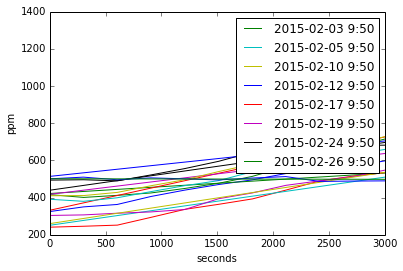

In [6]:
def process_data(begin, end, data, plot=False):
    x = data['Timestamp'][begin:end]
    x = x - x[0]
    y = data['CO2'][begin:end]

    fit = np.polyfit(x,y,1)
    room_ppm_per_second = fit[0]
    room_ppm_per_minute = room_ppm_per_second * 60
    ppm_per_student_per_minute = 0.176
    num_students = room_ppm_per_minute / ppm_per_student_per_minute

    if plot:
        yfit = np.polyval(fit, x)
        plt.plot(x, y)
        plt.plot(x, yfit, label=begin)
        plt.xlabel ("seconds")
        plt.ylabel ("ppm")
        plt.legend()
        plt.xlim((0, 3000))

    print('Start time = {}'.format(begin))
    print('End time = {}'.format(end))
    print(len(x))
    print('Carbon dioxide rate of increase {:.2f} ppm per minute'.format(room_ppm_per_minute))    
    print('Estimated number of students: {:.0f}'.format(num_students))
    print()

class_starts = (
                ('2015-02-03 9:50', '2015-02-03 12:00'),
                ('2015-02-05 9:50', '2015-02-05 12:00'),
                ('2015-02-10 9:50', '2015-02-10 12:00'),
                ('2015-02-12 9:50', '2015-02-12 12:00'),
                ('2015-02-17 9:50', '2015-02-17 12:00'),
                ('2015-02-19 9:50', '2015-02-19 12:00'),
                ('2015-02-24 9:50', '2015-02-24 12:00'),
                ('2015-02-26 9:50', '2015-02-26 12:00'),
               )

for begin, end in class_starts:
    process_data(begin, end, data, plot=True)

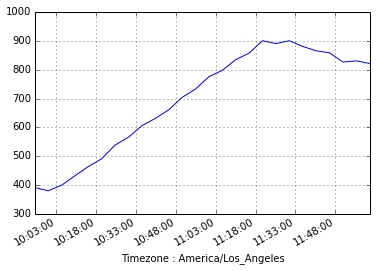

In [7]:
begin = '2015-02-19 9:50'
end = '2015-02-19 12:00'
data['CO2'][begin:end].plot()

In [8]:
num_students = np.array([29, 31, 22, 25, 29,])

In [10]:
np.mean(num_students)

27.199999999999999